# Predict next transaction day

In [1]:
from contextlib import contextmanager
import time
%load_ext autoreload
%autoreload 2
from preprocessing import *
from feature_engineering import *
from train_evaluate import *
from sklearn.ensemble import RandomForestClassifier
from datetime import date

In [2]:
@contextmanager
def timer(name):
    time_before_func_call = time.time()
    yield
    time_after_func_call = time.time()
    print('{} - done in {:.0f}s'.format(name, time_after_func_call - time_before_func_call))

<br>
<br>

**Preprocess**

In [3]:
with timer("Read invoice data"):
    invoices_2011 = pd.read_excel("data/retail/Online_Retail.xlsx")
    invoices_2010 = pd.read_excel("data/retail/online_retail_II.xlsx")
    
with timer("Preprocess invoice dataframes"):
    invoices_2010 = rename_columns(invoices_2010)
    invoices = concat_invoice_dataframes(invoices_2010, invoices_2011)
    invoices = add_revenue_column(invoices)
    invoices = drop_test_invoices(invoices)
    invoices = drop_cancellation_invoices(invoices)
    invoices = drop_return_invoices(invoices)
    invoices = drop_non_numeric_invoice_numbers(invoices)

Read invoice data - done in 115s
Preprocess invoice dataframes - done in 4s


<br>
<br>

**Train**

In [4]:
with timer("Get observation period end dates"):
    observation_end_dates = get_observation_end_dates(invoices)
    
with timer("Get naive labels"):
    naive_labels = get_naive_labels(invoices, observation_end_dates)

with timer("Train models"):
    train_results = train_models(
        RandomForestClassifier, invoices, observation_end_dates, 
        n_estimators=1500,
        max_depth=7,
        n_jobs=6
    )

Get observation period end dates - done in 0s
Get naive labels - done in 18s
Train models - done in 83s


<br>
<br>

**Evaluate**

observation period end: 2010-02-01
MODEL - train precision: 1.0, test precision: 0.769, # +Predictions: 104
NAIVE - train precision: 0.75, test precision: 0.667, # +Predictions: 183
---
observation period end: 2010-03-01
MODEL - train precision: 0.976, test precision: 0.787, # +Predictions: 174
NAIVE - train precision: 0.667, test precision: 0.72, # +Predictions: 243
---
observation period end: 2010-04-01
MODEL - train precision: 0.92, test precision: 0.613, # +Predictions: 349
NAIVE - train precision: 0.72, test precision: 0.676, # +Predictions: 290
---
observation period end: 2010-05-01
MODEL - train precision: 0.906, test precision: 0.666, # +Predictions: 296
NAIVE - train precision: 0.676, test precision: 0.628, # +Predictions: 298
---
observation period end: 2010-06-01
MODEL - train precision: 0.974, test precision: 0.685, # +Predictions: 286
NAIVE - train precision: 0.628, test precision: 0.651, # +Predictions: 327
---
observation period end: 2010-07-01
MODEL - train precision: 0

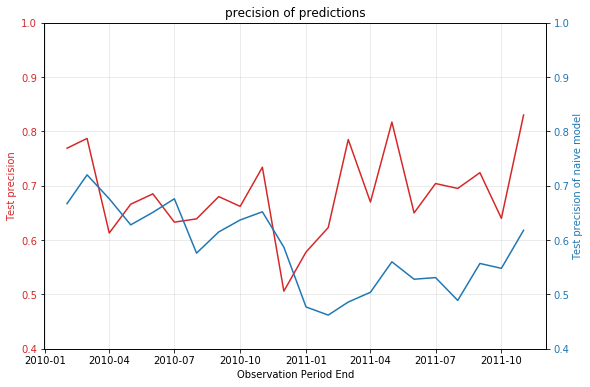

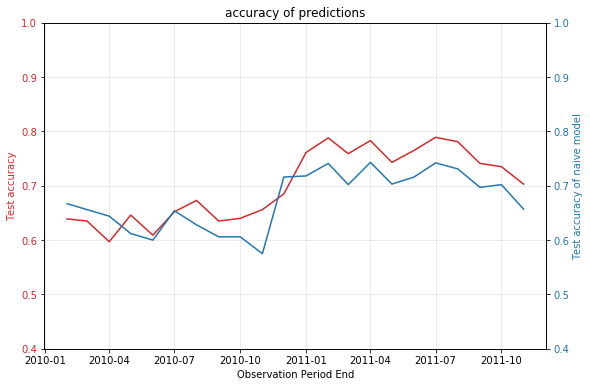

In [5]:
with timer("Evaluate models"):
    evaluate_models(train_results, naive_labels, metric='precision', average_all_months=False)
    evaluate_models_by_plotting(train_results, naive_labels, metric='precision')
    evaluate_models_by_plotting(train_results, naive_labels, metric='accuracy')

<br>
<br>

**Single month evaluation**

              precision    recall  f1-score   support

       False       0.74      0.97      0.84      1582
        True       0.82      0.25      0.38       738

    accuracy                           0.74      2320
   macro avg       0.78      0.61      0.61      2320
weighted avg       0.76      0.74      0.69      2320



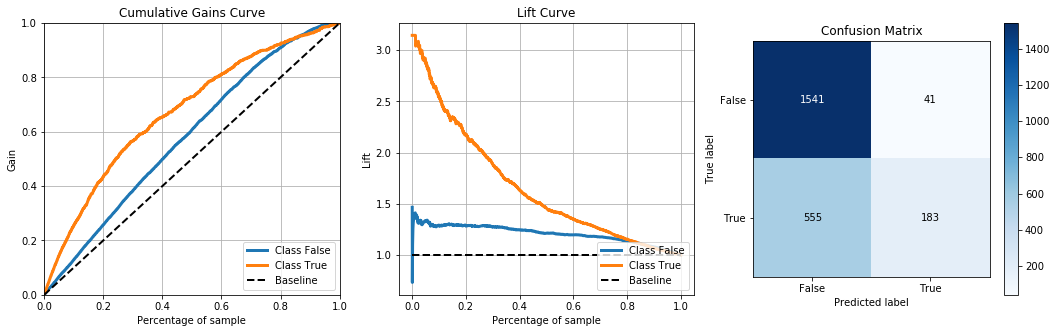

In [7]:
single_month_performance(train_results, date(2011,5,1))

<br>
<br>